# [RQ1] Exploratory Data Analysis (EDA) - Before working on your research questions, you should provide meaningful statistical summaries through visualizations and tabular tools to understand your data.



<h3 align = "center">Data Cleaning, Processings, Summaries, and Visualisations. </h3>

To begin, I will initially focus on examining the individual columns of this dataset by inspecting a single portion (chunk), rather than loading the entire dataset to improve efficiency.

In [21]:
# libraries used throughout the notebook
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math
from datetime import date

chunk_size = 10000
chunks = pd.read_json("/home/ec2-user/lighter_books.json", lines = True, chunksize = chunk_size)

for chunk in chunks:
    chunk.info() # information on the dataset: columns, size, dtypes etc.
    break

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         9999 non-null   int64  
 1   title                      9999 non-null   object 
 2   authors                    3742 non-null   object 
 3   author_name                9999 non-null   object 
 4   author_id                  9999 non-null   int64  
 5   work_id                    9999 non-null   int64  
 6   isbn                       9999 non-null   object 
 7   isbn13                     9999 non-null   object 
 8   asin                       9999 non-null   object 
 9   language                   9999 non-null   object 
 10  average_rating             9999 non-null   float64
 11  rating_dist                9999 non-null   object 
 12  ratings_count              9999 non-null   int64  
 13  text_reviews_count         9999 non-null   int64

In [121]:
chunk.describe() # to get the summary statistics

,id,author_id,work_id,average_rating,ratings_count,text_reviews_count
count,9999.000000,9.999000e+03,9.999000e+03,9999.000000,9.999000e+03,9999.000000
mean,7893.816682,5.933598e+05,3.259050e+06,3.898567,1.145203e+05,3176.441644
std,4496.188319,2.182146e+06,9.849316e+06,0.536518,4.032075e+05,9014.182288
min,2.000000,4.000000e+00,6.200000e+01,0.000000,0.000000e+00,0.000000
25%,3971.500000,2.238000e+03,1.362900e+04,3.760000,2.135000e+02,16.000000
50%,7982.000000,4.991000e+03,8.565990e+05,3.960000,3.059000e+03,159.000000
75%,11830.500000,8.516000e+03,2.271000e+06,4.150000,3.580650e+04,1634.500000
max,15516.000000,2.086472e+07,8.856621e+07,5.000000,7.377351e+06,116930.000000


Looking at the information from `chunk.info()`, the only numerical Data Types we have are: id, work_id, author_id, average_rating, ratings_count, and text_reviews_count. Also, the summary statistics of numerical data, especially min and max values. from `chunk.describe()` shows that the columns with numerical data behave nicely. Let's explore the columns of this dataset. First, just lets take the first 3.

In [130]:
chunk[["id", "title", "authors"]].head(10) # to get the first 10 values

,id,title,authors
0,2,Harry Potter and the Order of the Phoenix (Har...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro..."
1,3,Harry Potter and the Sorcerer's Stone (Harry P...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro..."
2,4,Harry Potter and the Chamber of Secrets (Harry...,None
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro..."
4,6,Harry Potter and the Goblet of Fire (Harry Pot...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro..."
5,7,"The Harry Potter Collection (Harry Potter, #1-6)","[{'id': '1077326', 'name': 'J.K. Rowling', 'ro..."
6,8,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...","[{'id': '1077326', 'name': 'J.K. Rowling', 'ro..."
7,10,"Harry Potter Collection (Harry Potter, #1-6)",None
8,11,The Hitchhiker's Guide to the Galaxy (Hitchhik...,None
9,12,The Ultimate Hitchhiker's Guide: Five Complete...,None


In [131]:
chunk[["id", "title", "authors"]].isnull().sum() # checking how many missing values we have for the three columns

id            0
title         0
authors    6257
dtype: int64

we see that there are 6257/10000 entries from authors column, in this current chunk, which are null. We will eventually not use this column as it does not contain enough data.

In [132]:
chunk["authors"].head()

0    [{'id': '1077326', 'name': 'J.K. Rowling', 'ro...
1    [{'id': '1077326', 'name': 'J.K. Rowling', 'ro...
2                                                 None
3    [{'id': '1077326', 'name': 'J.K. Rowling', 'ro...
4    [{'id': '1077326', 'name': 'J.K. Rowling', 'ro...
Name: authors, dtype: object

Lets see the structure of each element of authors column. Note: seems like there is a none value on the 3rd row. Lets check it out too.

In [133]:
print(chunk["authors"][0])

[{'id': '1077326', 'name': 'J.K. Rowling', 'role': ''}, {'id': '2927', 'name': 'Mary GrandPré', 'role': 'Illustrator'}]


It is a list of dictionaries containing as keys id, name, and role of the author who worked on a book.

In [134]:
print(chunk["authors"][2])

None


We get a `None` which means there are no authors for this entry of the books dataset. By running the `chunk.info()` code, we can see that there also exisits author_name column. Lets check if there is an entry for the author_name for the third row of this dataset.

In [135]:
print(chunk["author_name"][2])

J.K. Rowling


Now, lets see the number of unique values in the id and title columns.

In [137]:
chunk[["id", "title"]].nunique()

id       9999
title    8623
dtype: int64

We can see that the id is unique in its entirety (also making assumption for the whole data set), while title, as one can expect, is not. So these two columns are fine to work with.

Now, I will quicly check if the non numeric columns, with Object dtype, have values that contain nothing `''`.

In [138]:
missing_title = (chunk["title"] == '').sum()
print(missing_title)
missing_author_name = (chunk["author_name"] == '').sum()
print(missing_author_name)

0
0


For the specific chunk, we can analyse that there is no entry in both title and author_name columns that are empty. As for the authors column, there will be many None (missing) values along the way in the *complete* dataset. As shown before, just for 10000 entries, we have 6257 None entries. Also, for the fact that we matched the author_name for the entry where authors column had a None as an entry, it makes sense to dropping this column in the future as it will not be meaningful to work with. Now let's see the next three columns. Without much explanation, I will be running the similar steps and analysis the columns.

In [139]:
chunk[["author_name", "author_id", "work_id"]].head(10)

,author_name,author_id,work_id
0,J.K. Rowling,1077326,2809203
1,J.K. Rowling,1077326,4640799
2,J.K. Rowling,1077326,6231171
3,J.K. Rowling,1077326,2402163
4,J.K. Rowling,1077326,3046572
5,J.K. Rowling,1077326,21457570
6,J.K. Rowling,1077326,21457576
7,J.K. Rowling,1077326,21457570
8,Douglas Adams,4,3078186
9,Douglas Adams,4,135328


For the author_id columns, it seems like the entries changes from 6 digits in length to 1 quickly. I would like to eyeball if this is normal. I did it with the first 100 `head(100)` entries too. Seems reasonable.

In [140]:
chunk["author_id"].sort_values()[30:45]

5463    4
11      4
5472    4
13      4
14      4
15      4
16      4
5473    4
1438    4
10      4
2431    7
3175    7
3176    7
3177    7
6153    7
Name: author_id, dtype: int64

In [141]:
chunk[["author_name", "author_id", "work_id"]].isnull().sum()

author_name    0
author_id      0
work_id        0
dtype: int64

In [142]:
chunk[["author_name", "author_id"]].value_counts().sort_values(ascending=False).head(10)

author_name          author_id
Stephen King         3389         121
Piers Anthony        8516          92
William Shakespeare  947           86
J.R.R. Tolkien       656983        80
Dick Francis         5561          66
David Burnie         5472          57
Dan Simmons          2687          57
Euripides            973           54
Charles Dickens      239579        54
Roald Dahl           4273          50
Name: count, dtype: int64

I can see that there are many names appearing multiple times. I should not take the decision to drop duplicates now, for the entire structure of dataset is not known.

Now, I would like to confirm if each author_name has its unique author_id.

In [143]:
author_ids = len(set(chunk["author_id"]))
author_name = len(chunk["author_name"].drop_duplicates())
author_ids == author_name

True

I will grab some more columns and repeat similar process:

In [ ]:
chunk[["isbn", "isbn13", "asin", "language"]].head(10)

Seems like asin column contains nothing Also, both isbn and isbn13 are have missing entries. lets check:

In [150]:
total_values_present_asin = len(chunk["asin"]) - (chunk["asin"] == '').sum()
total_values_present_asin

6

As can be seen, this column in not useful and can be dropped in future. Let's explore isbn and isbn13.

In [ ]:
chunk[["isbn", "isbn13"]].isnull().sum()

If we check if there are null entries in the dataset for isbn and isbn13 columns, it tells us there are none. Lets pick an entry which appear to be missing and analyse it.

In [ ]:
chunk["isbn"][1]

In [ ]:
type(chunk["isbn"][1])

Seems like there are empty but instantiated strings which are being counted.

In [ ]:
missing_isbn13 = (chunk["isbn13"] == '').sum()
print(missing_isbn13)
missing_isbn = (chunk["isbn"] == '').sum()
print(missing_isbn)
missing_isbn13 > missing_isbn

Even though it is not safe to go with this assumption, but in a general case, as there are more entries in isbn13 column, I will decide to keep this one and abandon isbn column in future.

Now, due to the domain knowledge, we know that isbn13 must have 13 digits. lets see for how many values it is not true.

In [ ]:
invalid_isbn13 = chunk['isbn13'].str.len() != 13
invalid_isbn13.sum()

There are many entries, unfortunately, that has length of isbn differennt from 13. This raises doubts about the integrity of data. Also, there are about 5428 (in the whole dataset - not in just this chunk) entries in the isbn13 column which have an alphabet inside them, which untimately means that the entry is not a valid isbn. It can be verifed by:

`test = thenameofdataset['isbn13'].copy()`

`contains_alpha = test.str.contains(r'[a-zA-Z]', na=False)`

`true_indices = contains_alpha[contains_alpha].index`

`len(true_indices)`

But lets assume our analysis and deal with the language column and view the most common langauge in the dataset.

In [ ]:
chunk["language"].value_counts().sort_values(ascending=False).head(5)

Now, lets explore the final set of columns as well.

In [ ]:
chunk[["average_rating", "rating_dist", "ratings_count", "text_reviews_count", "publication_date"]].head(10)

We have already analysed, with the help of `chunk.describe()` that average_rating, rating_count, and text_reviews_count seems to behave normally. Lets now focus on ratings_dist column. 

In [ ]:
chunk["rating_dist"][0]

Looking at the first element, it seems like it is a distribution of the rating. It contains, for each book, count of reviews for each rating and then ultimately also the total count at the end.

Now, lets verify if the each element in the ratings_count matches the total_count in the rating_dist

In [152]:
def extract_totals_from_column(column_data):
    total_values = []

    for element in column_data:
        parts = element.split('|')
        total = None

        for part in parts:
            if part.startswith('total:'):
                total = int(part.split(':')[1])
                break

        total_values.append(total)

    return total_values

In [153]:
rating_dist_column = chunk["rating_dist"].copy()
just_the_total = extract_totals_from_column(rating_dist_column)
if (just_the_total == chunk["ratings_count"]).sum() == 9999:
    print("True")

True


As the size of our chunk is 10000 (starting from index 0), we can safely conclude that there is no problem in the 'total:' part of the rating_dist column which also helps us validate the ratings_count column. I will just quickly check the publication_date column. 

In [ ]:
type(chunk["publication_date"][0])

we can see that each element is a string, which is not ideal for date based computations. Lets see if there are any empty strings:

In [ ]:
missing_publication_date = (chunk["publication_date"] == '').sum()
print(missing_publication_date)

We can see that there are 1355 missing entries for only this specific chunk of data. But as this column can prove to be useful, I will keep it for future. Lets check the count of any empty entries in the original_publication_date columns.

In [ ]:
missing_original_publication_date = (chunk["original_publication_date"] == '').sum()
print(missing_original_publication_date)

It is much much lower the the publication_date column. We will keep both. In the main dataset, I will fix the data type issue of the dates - being different from date objects right now - by using the following code (or something similar):

`df["publication_date"] = pd.to_datetime(df["publication_date"], format='mixed')`

`df["original_publication_date"] = pd.to_datetime(df["original_publication_date"], format='mixed')`

Achieving high precision may be challenging due to the presence of missing elements in the date values, such as month or day for some entries. Working primarily with the Year and Month components should provide a reasonable level of data consistency and usability in most instances.

Also, the missing entries `''` will be replaced with None.

In [154]:
chunk["num_pages"].head()

0    870
1    309
2    352
3    435
4    734
Name: num_pages, dtype: object

Lastly, looking at the num_pages column, we can see that it has a dtype of object. lets see if there are any entries that are empty.

In [155]:
missing_num_pages = (chunk["num_pages"] == '').sum()
print(missing_num_pages)

1821


Althugh there are many missing entries here too, we can still keep this column. Also, to ensure all emptpy strings `''`are converted to `nan` or `None`, I can run the following code in the main dataframe later:

`df["num_pages"] = pd.to_numeric(df["num_pages"], errors='coerce')`

Eyeballing over the rest of the columns exhibit that they may not be needed in the dataset. So I will only be using the columns that are useful according to our analysis above.

Loading the whole `lighter_books.json` dataset:

In [ ]:
import pandas as pd
chunk_size = 10000

chunks = pd.read_json("/home/ec2-user/lighter_books.json", lines = True, chunksize = chunk_size)

columns_to_keep = [
    "id", "title", "author_name", "author_id", "work_id", "isbn13",
    "average_rating", "ratings_count", "text_reviews_count",
    "publication_date", "original_publication_date", "num_pages", 
    "series_id", "series_position", "series_name"
]


list_of_dataframes = []

for chunk in chunks:
    
    list_of_dataframes.append(chunk[columns_to_keep])
    
df = pd.concat(list_of_dataframes, ignore_index=True)

In [170]:
dfw = df.copy() # making a copy of the data frame for efficiency reasons

In [171]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027431 entries, 0 to 7027430
Data columns (total 15 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   id                         int64  
 1   title                      object 
 2   author_name                object 
 3   author_id                  int64  
 4   work_id                    int64  
 5   isbn13                     object 
 6   average_rating             float64
 7   ratings_count              int64  
 8   text_reviews_count         int64  
 9   publication_date           object 
 10  original_publication_date  object 
 11  num_pages                  object 
 12  series_id                  object 
 13  series_position            object 
 14  series_name                object 
dtypes: float64(1), int64(5), object(9)
memory usage: 804.2+ MB


In [172]:
dfw.head()

,id,title,author_name,author_id,work_id,isbn13,average_rating,ratings_count,text_reviews_count,publication_date,original_publication_date,num_pages,series_id,series_position,series_name
0,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,1077326,2809203,9780439358071,4.50,2628006,44716,2004-09,2003-06-21,870,45175,5,Harry Potter
1,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,1077326,4640799,,4.48,7377351,116930,2003-11-01,1997-06-26,309,45175,1,Harry Potter
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,1077326,6231171,9780439554893,4.43,2855044,55286,2003-11-01,1998-07-02,352,45175,2,Harry Potter
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,1077326,2402163,9780439655484,4.57,2946694,58023,2004-05-01,1999-07-08,435,45175,3,Harry Potter
4,6,Harry Potter and the Goblet of Fire (Harry Pot...,J.K. Rowling,1077326,3046572,,4.56,2705676,48637,2002-09-28,2000-07-08,734,45175,4,Harry Potter


In [173]:
dfw.isnull().sum() # counting the number of null entries in each column of the dataframe

id                           0
title                        0
author_name                  0
author_id                    0
work_id                      0
isbn13                       0
average_rating               0
ratings_count                0
text_reviews_count           0
publication_date             0
original_publication_date    0
num_pages                    0
series_id                    0
series_position              0
series_name                  0
dtype: int64

Trying to check the number of missing entries, in the columns with dtype Object, which may contain nothing `''`.

In [174]:
title_missing = (dfw["title"] == '').sum() 
print(title_missing)
author_name_missing = (dfw["author_name"] == '').sum() 
print(author_name_missing)
isbn13_missing = (dfw["isbn13"] == '').sum() 
print(isbn13_missing)

publication_date_missing = (dfw["publication_date"] == '').sum() 
print(publication_date_missing)
original_publication_date_missing = (dfw["original_publication_date"] == '').sum() 
print(original_publication_date_missing)
num_pages_missing = (dfw["num_pages"] == '').sum() 
print(num_pages_missing)


series_id_missing = (dfw["series_id"] == '').sum() 
print(series_id_missing)
series_position_missing = (dfw["series_position"] == '').sum() 
print(series_position_missing)
series_name_missing = (dfw["series_name"] == '').sum() 
print(series_name_missing)

33
0
2012197
2138139
415746
3071835
5162295
5354166
5162328


Out of such a big dataset, only 33 book entries do not have their title and it would not make sense for an entry to be without a title. For this purpose, we will drop the entries (rows) entirely. 

There are no author names that are missing. As for the isbn13, publication_date, original_publication_date, and num_pages columns, we have seen previosuly that they do contain entries with just `''`.

Now, I will replace the entries which contain nothing, `''`, and replace it with none or nan. Plus some additional processing for isbn13 and dates.

In [175]:
# dfw = dfw[dfw['title'] != '']
# Find the indices of rows with missing titles
missing_title_indices = dfw[dfw["title"] == ''].index
# Use the drop method to remove rows with missing titles
dfw = dfw.drop(missing_title_indices)

In [176]:
# converting the datatype of number of pages to float
dfw["num_pages"] = pd.to_numeric(dfw["num_pages"], errors='coerce') 
# Use str.contains with a regular expression pattern to set values to None if they contain alphabetic characters
dfw.loc[dfw["isbn13"].str.contains(r'[a-zA-Z]'), "isbn13"] = None
# for each element in the respective columns, if there is an empty string, replace it with None
dfw["isbn13"] = dfw["isbn13"].apply(lambda x: x if x != '' else None)
dfw["series_id"] = dfw["series_id"].apply(lambda x: x if x != '' else None)
dfw["series_position"] = dfw["series_position"].apply(lambda x: x if x != '' else None)
dfw["series_name"] = dfw["series_name"].apply(lambda x: x if x != '' else None)

In [177]:
# function implemented to replace the value of isbn13 with None if the length of isbn13 is different from 13 
def set_to_none_if_length_not_13(x): 
    if pd.notna(x) and len(str(x)) != 13:
        return None
    return x
dfw["isbn13"] = dfw["isbn13"].apply(set_to_none_if_length_not_13)

In [194]:
# Define a list of formats to be tried
date_formats = ['%Y', '%Y-%m', '%Y-%m-%d']

# Initialize a Series to store the parsed dates
parsed_dates = pd.Series()

# Try to parse the dates using the different formats
for fmt in date_formats:
    parsed_dates = parsed_dates.combine_first(pd.to_datetime(df["publication_date"], format=fmt, errors='coerce'))

# Add the parsed dates back to the DataFrame
dfw["publication_date"] = parsed_dates
dfw['publication_date'] = pd.to_datetime(dfw['publication_date'], errors='coerce')

In [179]:
# Define a list of formats to be tried
date_formats = ['%Y', '%Y-%m', '%Y-%m-%d']

# Initialize a Series to store the parsed dates
parsed_dates = pd.Series()

# Try to parse the dates using the different formats
for fmt in date_formats:
    parsed_dates = parsed_dates.combine_first(pd.to_datetime(df["original_publication_date"], format=fmt, errors='coerce'))

# Add the parsed dates back to the DataFrame
dfw["original_publication_date"] = parsed_dates

Again, using the domain knowledge, and given the fact that some date entries only have year as entry, lets put a simple bolean mask where we see how many entries are there with dates > 2023.

In [180]:
dfw['publication_date'] = pd.to_datetime(dfw['publication_date'])
mask = dfw['publication_date'].dt.year > 2023
mask.sum()

315

We see that there are 315 entries that are out of bound and can seriously effect the data. Lets see the maximum date in our dataset to see how badly it may effect the visual analysis later on.

In [181]:
dfw['publication_date'].dt.year.sort_values(ascending=False).head()

3387902    2209.0
3815663    2208.0
6809474    2208.0
7019892    2207.0
5072432    2207.0
Name: publication_date, dtype: float64

It makes sense to drop these entries too!

In [182]:
dfw = dfw[dfw['publication_date'].dt.year <= 2023]

Lets check the number of missing entries now after cleaning the data and dropping the duplicates from title and id column.

In [195]:
dfw.isnull().sum()

id                                 0
title                              0
author_name                        0
author_id                          0
work_id                            0
isbn13                        804714
average_rating                     0
ratings_count                      0
text_reviews_count                 0
publication_date                   0
original_publication_date     204577
num_pages                    1085637
series_id                    3538667
series_position              3679353
series_name                  3538691
dtype: int64

Lastly, we have to drop entries where both title, author_id, and id column values are repeated to avoid duplicates.

In [184]:
dfw = dfw.drop_duplicates(subset=["id","title", "author_id"], keep=False) # drops where both column values are repeated

Now, it is time see the summary statistics of the numerical data by using `dfw.describe()`.

In [185]:
dfw.describe()

,id,author_id,work_id,average_rating,ratings_count,text_reviews_count,publication_date,num_pages
count,4.885729e+06,4.885729e+06,4.885729e+06,4.885729e+06,4.885729e+06,4.885729e+06,4885729,3.800165e+06
mean,1.277367e+07,1.943551e+06,1.354699e+07,3.316051e+00,2.126486e+04,7.084196e+02,2003-10-17 02:16:36.147105792,2.032908e+03
min,2.000000e+00,4.000000e+00,6.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1678-01-01 00:00:00,0.000000e+00
25%,6.442554e+06,3.123200e+04,1.500390e+06,3.380000e+00,3.000000e+00,0.000000e+00,2000-06-09 00:00:00,1.320000e+02
50%,1.372432e+07,2.363910e+05,6.627510e+06,3.820000e+00,5.200000e+01,6.000000e+00,2009-01-01 00:00:00,2.320000e+02
75%,1.842555e+07,3.218132e+06,2.187666e+07,4.080000e+00,9.380000e+02,7.600000e+01,2012-09-15 00:00:00,3.440000e+02
max,2.552102e+07,2.121742e+07,8.972161e+07,5.000000e+00,7.400639e+06,1.745180e+05,2023-09-17 00:00:00,2.147484e+09
std,7.555132e+06,3.158859e+06,1.497099e+07,1.422417e+00,1.718496e+05,4.474538e+03,NaN,1.792425e+06


The num_pages column seems to have a very irregular maximum number. It will negatively effect our analysis using graphical tools such as boxplots or histograms. 

In [188]:
dfw["num_pages"].sort_values(ascending = False).head()

6973762    2.147484e+09
4665163    2.147484e+09
3869066    1.409131e+09
2651422    1.000000e+09
6027227    1.000000e+07
Name: num_pages, dtype: float64

The top 5 maximum entries for number of pages column is horrendous. Now, I will do the univariate analysis of some numeric (including dates) columns first. Lets see the numeric page column.

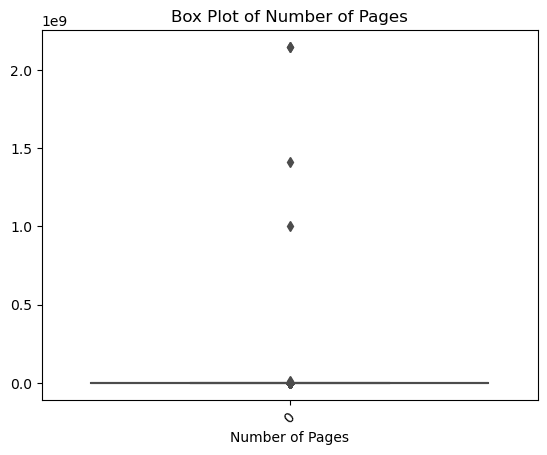

In [189]:
plt.figure()
sns.boxplot(dfw['num_pages'], color='b')
plt.title('Box Plot of Number of Pages')
plt.xlabel('Number of Pages')
plt.xticks(rotation=45)
plt.show()

The result is of no surprise given our analysis and heavy tail. Makes sense to set values to None if the entries have number of pages > 15000

In [190]:
dfw["num_pages"] = dfw["num_pages"].apply(lambda x: x if x <= 15000 else None)

Now lets look the date column.

Text(0.5, 0, 'Year')

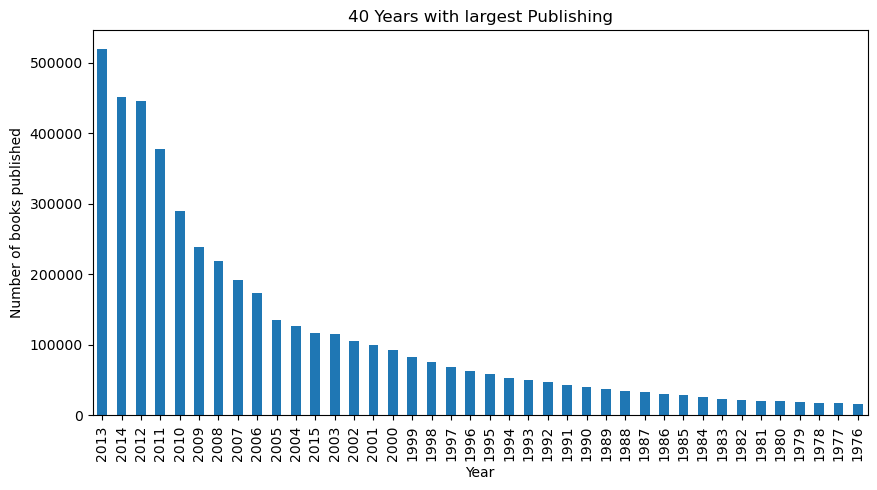

In [196]:
dfw['publication_date'].dt.year.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("40 Years with largest Publishing")
plt.ylabel('Number of books published')
plt.xlabel("Year")

Lets also see the box plot of publication date colums

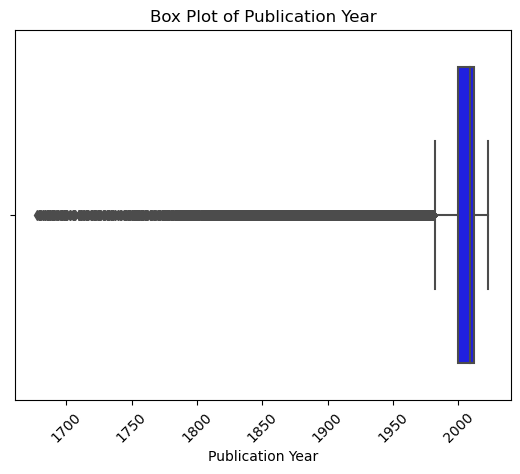

In [197]:
dfw['publication_year'] = dfw['publication_date'].dt.year
plt.figure()
sns.boxplot(data=dfw, x='publication_year', color='b')
plt.title('Box Plot of Publication Year')
plt.xlabel('Publication Year')
plt.xticks(rotation=45)
plt.show()

The range gives us a measurement of how spread out the entirety of our data set is. The interquartile range, which tells us how far apart the first and third quartile are, indicates how spread out the middle 50% of our set of data is. [Source](https://www.thoughtco.com/what-is-the-interquartile-range-3126245)

As can be seen from the plot, the interquartile range for the Publication Year column is pretty narrow, which indicates that the middle 50% of the books of this dataset are between 2000's and 2010's - referring to the interquartile range. One can check this out using `describe()` as well

In [198]:
dfw['publication_date'].dt.year.describe()

count    4.885729e+06
mean     2.003406e+03
std      1.476161e+01
min      1.678000e+03
25%      2.000000e+03
50%      2.009000e+03
75%      2.012000e+03
max      2.023000e+03
Name: publication_date, dtype: float64

Now, lets make a quick pie chart of the Average Rating across the Dataset with some bolean masks.

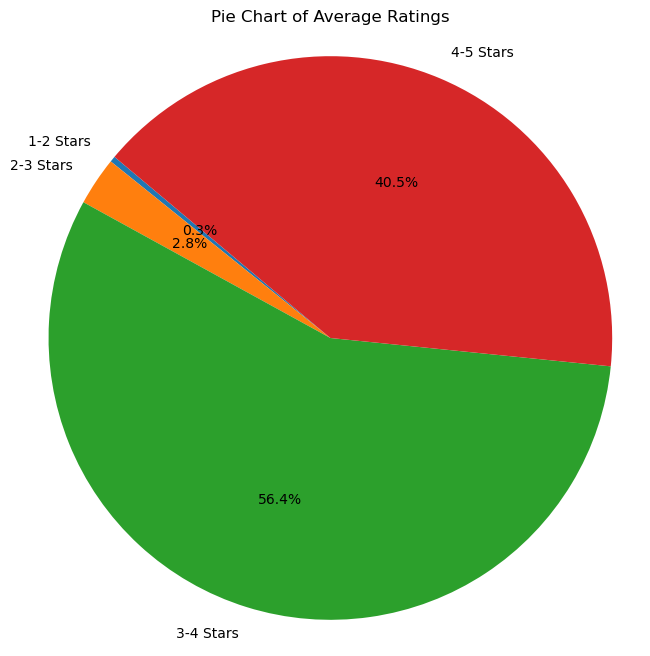

In [199]:
# Create a modified DataFrame with rating categories
rating_categories = dfw['average_rating']

# Defining custom rating categories
categories = ['1-2 Stars', '2-3 Stars', '3-4 Stars', '4-5 Stars']
category_counts = [
    rating_categories[(rating_categories >= 1) & (rating_categories < 2)].count(),
    rating_categories[(rating_categories >= 2) & (rating_categories < 3)].count(),
    rating_categories[(rating_categories >= 3) & (rating_categories < 4)].count(),
    rating_categories[(rating_categories >= 4) & (rating_categories <= 5)].count()
]

plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Average Ratings')
plt.axis('equal') 
plt.show()

It can be inferred from the pie chart that the most of the values of the average ratings column are between 3 to 4 category, followed by the 4-5 star category. From here, I will now see the most interesting non-numerical column of our dataset, the author_name column. Lets plot the bar plot of 30 most recurring authors of our dataset.

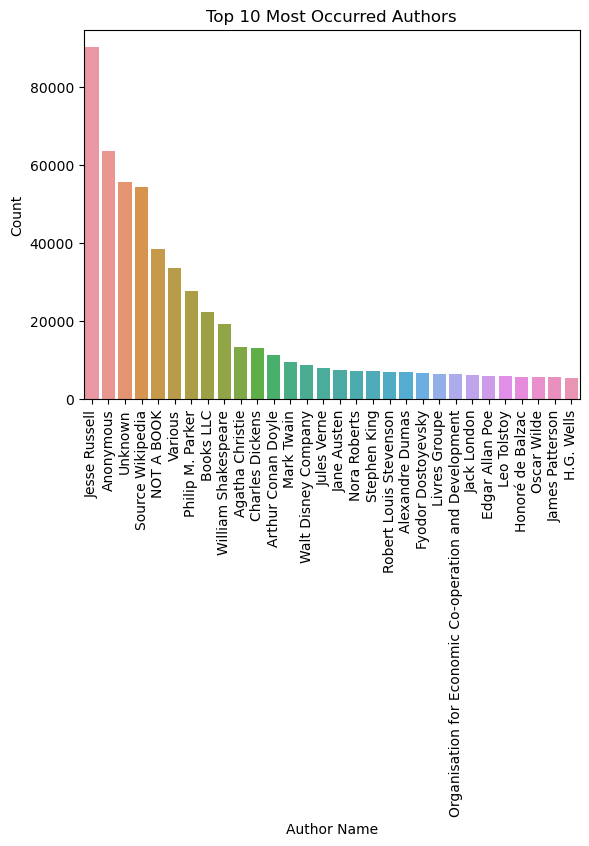

In [200]:
top_authors = df['author_name'].value_counts().head(30)
plt.figure()
sns.barplot(x=top_authors.index, y=top_authors.values)
plt.title('Top 10 Most Occurred Authors')
plt.xlabel('Author Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

By running `dfw["title"].nunique()`, one can anaylse that there are some titles that are recurring too. I wil also make a bar plot of top 10 most recurring book titles in our dataset.

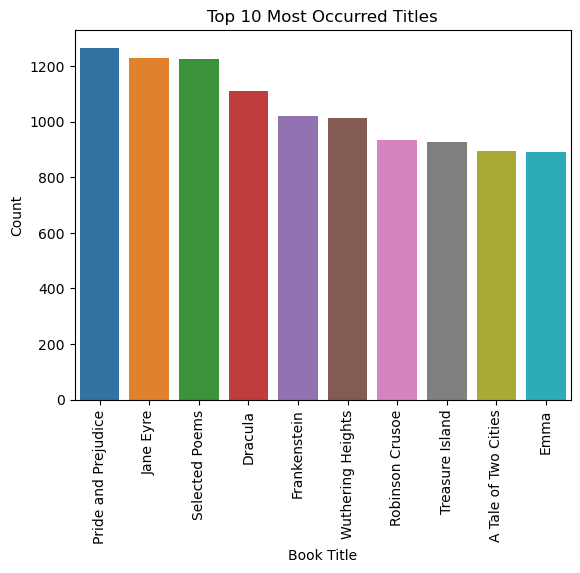

In [201]:
top_titles = df['title'].value_counts().head(10)
plt.figure()
sns.barplot(x=top_titles.index, y=top_titles.values)
plt.title('Top 10 Most Occurred Titles')
plt.xlabel('Book Title')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Finally, I will see the trend in average ratings over years 1800-2023:

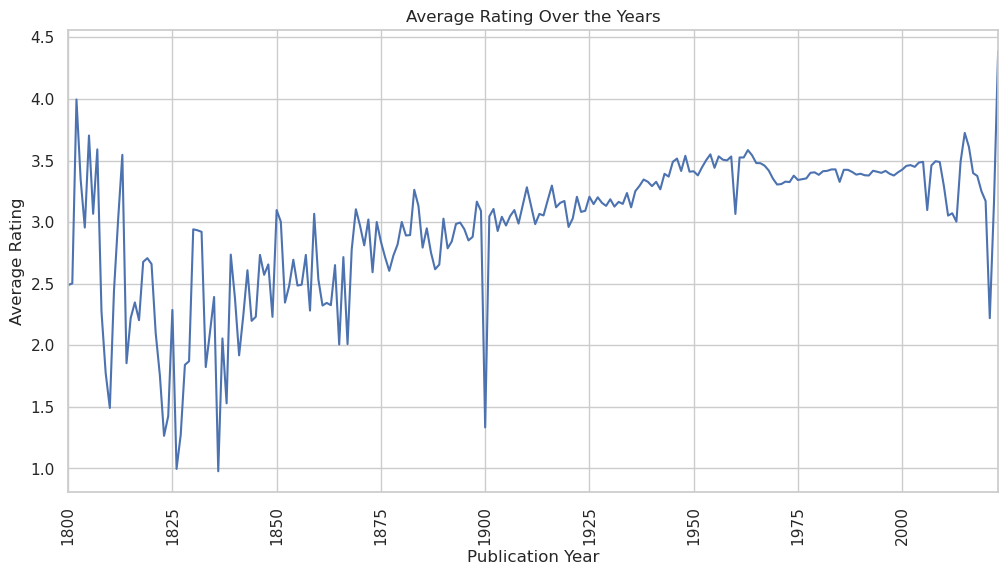

In [202]:
dfw['publication_date'] = pd.to_datetime(dfw['publication_date'])
dfw['publication_year'] = dfw['publication_date'].dt.year

# Filter the data for publication years between 1800 and 2023
dfw_filtered = dfw[(dfw['publication_year'] >= 1800) & (dfw['publication_year'] <= 2023)]
average_ratings_by_year = dfw_filtered.groupby('publication_year')['average_rating'].mean().reset_index()

# Set the style of the plot using Seaborn
sns.set(style="whitegrid")

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_ratings_by_year, x='publication_year', y='average_rating', color='b')
plt.title('Average Rating Over the Years')
plt.xlabel('Publication Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.xlim(1800, 2023)  # Set the x-axis limits
plt.show()

It is time to do the multivariate analysis. First, lets see if there is a relation between the ratings_count column and the average ratings. I have used log scale for Ratings Count column due to the scale mismatch. The plot does not disguise much about the relationship or trend but there seems to be some sort of positive relationship between the two columns.

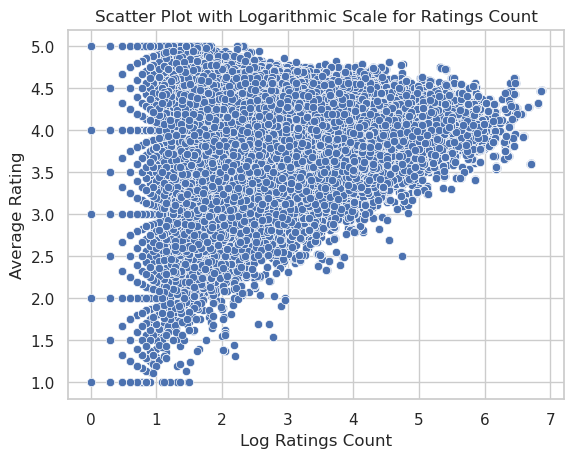

In [203]:
# Create a scatter plot with logarithmic scale
sns.scatterplot(x=np.log10(dfw['ratings_count']), y='average_rating', data=dfw, color='b')
# Add labels and a title
plt.xlabel("Log Ratings Count")
plt.ylabel("Average Rating")
plt.title("Scatter Plot with Logarithmic Scale for Ratings Count")
# Show the plot
plt.show()

Lastly, I will visualise the correlation among the numerical variables using heatmaps.

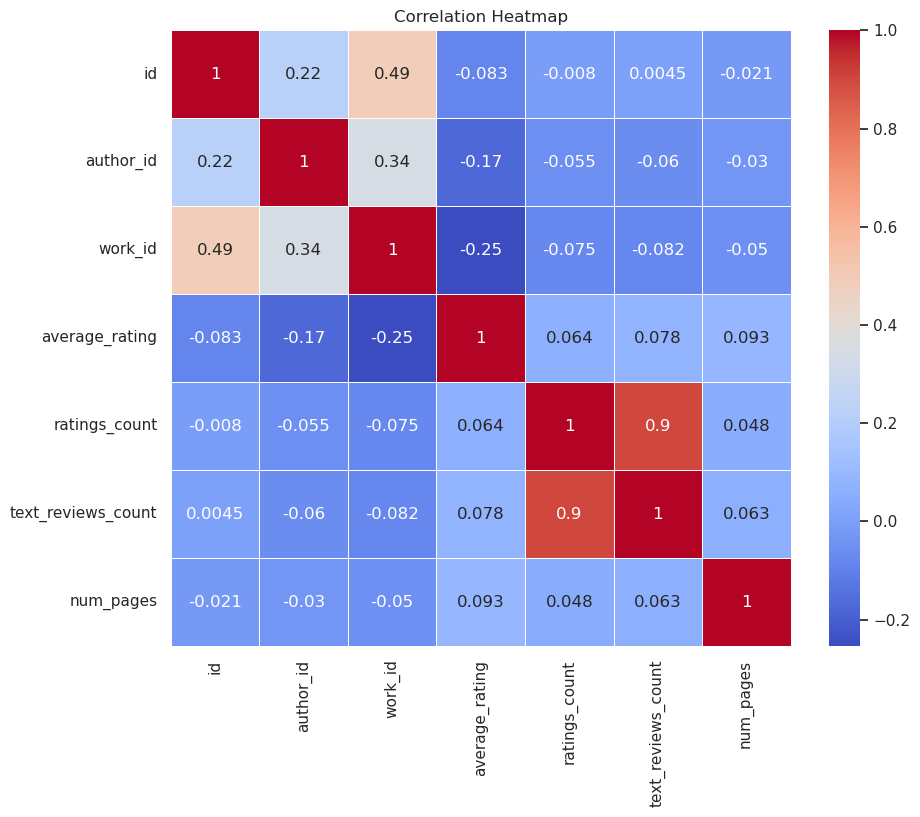

In [204]:
selected_columns = ["id","author_id","work_id","average_rating", "ratings_count", "text_reviews_count", "num_pages"]
data = dfw[selected_columns]
# Calculate the correlation matrix
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

It can be easily anaylsed from the correlation heatmap that except ratings_count & text_ratings count, and work_id & author_id, there exists very little to no correlation between the numerical variables.

Now, I will load the `lighter_authors.json` dataset.

In [2]:
df1 = pd.read_json("/home/ec2-user/lighter_authors.json", lines = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351767 entries, 0 to 351766
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ratings_count       351767 non-null  int64  
 1   average_rating      351767 non-null  float64
 2   text_reviews_count  351767 non-null  int64  
 3   work_ids            351767 non-null  object 
 4   book_ids            351767 non-null  object 
 5   works_count         351767 non-null  int64  
 6   id                  351767 non-null  int64  
 7   name                351767 non-null  object 
 8   gender              351767 non-null  object 
 9   image_url           351767 non-null  object 
 10  about               351767 non-null  object 
 11  fans_count          351767 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 32.2+ MB


In [3]:
df1.head()

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count
0,2862064,4.19,62681,"[3078186, 135328, 1877624, 74123, 3078120, 104...","[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,4,Douglas Adams,male,https://images.gr-assets.com/authors/159137433...,"Douglas Noël Adams was an English author, comi...",19826
1,1417316,4.02,84176,"[613469, 2305997, 940892, 2611786, 7800569, 31...","[9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...",75,7,Bill Bryson,male,https://images.gr-assets.com/authors/157859752...,"William McGuire ""Bill"" Bryson, OBE, FRS was bo...",16144
2,56159,4.53,352,"[17150, 808427, 20487307, 90550, 25460625, 171...","[349254, 15222, 14833682, 15221, 18126815, 152...",14,10,Jude Fisher,female,https://images.gr-assets.com/authors/141145711...,"Jude Fisher is the pseudonym for <a href=""http...",60
3,3302,3.79,480,"[4417, 14300808, 14780, 3796968, 44703121, 103...","[40, 9416484, 12482, 3753106, 26889789, 104764...",45,12,James Hamilton-Paterson,male,https://images.gr-assets.com/authors/127051738...,James Hamilton-Paterson's work has been transl...,72
4,7979,3.60,772,"[13330815, 19109351, 42306244, 72694240, 26291...","[8466327, 15739968, 22756778, 51026133, 260451...",61,14,Mark Watson,male,https://images.gr-assets.com/authors/133175379...,Mark Andrew Watson (born 13 February 1980) is ...,179


In [4]:
dfw1 = df1.copy()

Now, I will explore the statistical summaries of the numerical columns of the dataset.

In [5]:
dfw1.describe()

,ratings_count,average_rating,text_reviews_count,works_count,id,fans_count
count,3.517670e+05,351767.000000,351767.000000,3.517670e+05,3.517670e+05,351767.000000
mean,4.770586e+03,3.651194,330.993243,2.593714e+01,7.751861e+06,111.615731
std,9.769395e+04,1.211482,3857.539191,3.066083e+03,6.578409e+06,2661.018139
min,-4.100000e+01,-31.000000,0.000000,0.000000e+00,4.000000e+00,-33.000000
25%,6.000000e+00,3.600000,1.000000,2.000000e+00,1.535315e+06,1.000000
50%,3.900000e+01,3.950000,8.000000,6.000000e+00,6.470396e+06,4.000000
75%,3.100000e+02,4.250000,53.000000,1.500000e+01,1.434041e+07,20.000000
max,2.700375e+07,5.000000,608956.000000,1.775176e+06,2.124802e+07,766035.000000


The following columns appear to have negative values: ratings_count, average_rating, and fans_count, which is incorrect. I will analyse their count and replace the entries with None

In [6]:
wrong_entries_ratings_count = dfw1["ratings_count"] < 0
wrong_count_ratings_count = len(dfw1[wrong_entries_ratings_count])
print(wrong_count_ratings_count)
dfw1.loc[wrong_entries_ratings_count, "ratings_count"] = None

wrong_entries_average_rating = dfw1["average_rating"] < 0
wrong_count_average_rating = len(dfw1[wrong_entries_average_rating])
print(wrong_count_average_rating)
dfw1.loc[wrong_entries_average_rating, "average_rating"] = None

wrong_entries_fans_count = dfw1["fans_count"] < 0
wrong_count_fans_count = len(dfw1[wrong_entries_fans_count])
print(wrong_count_fans_count)
dfw1.loc[wrong_entries_fans_count, "fans_count"] = None

4
1
23


Driving the argument by intuition, the entries of the works_count and the work_ids columns must have the following relation: each entry of the works_count == len(each elem of work_ids). Lets check how many entries do not meet this condition:

In [7]:
dfw1['work_ids_count'] = dfw1['work_ids'].apply(lambda x: len(x))

In [8]:
wrong_entries = dfw1['work_ids_count'] != dfw1['works_count']
dfw1[wrong_entries]

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count,work_ids_count
60,2615.0,3.76,142,"[4537, 13420309, 45051364, 315736, 73900884, 1...","[191, 138238, 245131, 325070, 1971, 9831770, 7...",4607,119,McDougal Littell,,https://s.gr-assets.com/assets/nophoto/user/u_...,McDougal Littell publishes educational texts a...,20.0,1212
77,374448.0,3.61,24573,"[990886, 1434368, 3274683, 3319458, 121908, 13...","[12948, 264, 16204, 133954, 124272, 775366, 25...",2587,159,Henry James,male,https://images.gr-assets.com/authors/146830941...,"Henry James, OM, son of theologian Henry James...",2717.0,1455
80,351563.0,3.85,18036,"[1461747, 3049535, 3277447, 313957, 21503633, ...","[19089, 54539, 20564, 304, 20563, 835508, 8663...",824,173,George Eliot,female,https://images.gr-assets.com/authors/159620258...,"Mary Ann Evans, known by her pen name George E...",3050.0,799
100,15558.0,4.35,795,"[4694, 21740, 21738, 17397442, 1200856, 138402...","[397, 20549, 20547, 753796, 8454621, 143469, 7...",729,229,Abraham Lincoln,male,https://images.gr-assets.com/authors/119851815...,Abraham Lincoln was the sixteenth President of...,1405.0,716
167,470.0,3.61,46,"[4946, 2380136, 1165427, 50370217, 56407323, 5...","[699, 2373228, 1177622, 18099370, 434624, 1204...",420,458,James A. Henretta,male,https://s.gr-assets.com/assets/nophoto/user/m_...,<b>Dr. James A. Henretta</b> was the Priscilla...,4.0,411
...,...,...,...,...,...,...,...,...,...,...,...,...,...
340501,1252.0,3.92,149,"[19234106, 25026939, 41128333, 44489056, 41128...","[13627993, 36510615, 17874217, 24844473, 11725...",940,15863347,شركة والت ديزني,,https://images.gr-assets.com/authors/149863066...,شركة والت ديزني والمعروفة باسم ديزني هي أكبر ش...,26.0,912
342225,239.0,4.54,7,"[53341620, 54193000, 54185114, 54549819, 54550...","[32750203, 33432449, 33424754, 33674613, 33674...",9320,15976436,Fuente Wikipedia,,https://s.gr-assets.com/assets/nophoto/user/u_...,Fuente Wikipedia es un compilador y editor de ...,2.0,1142
343001,329.0,3.68,10,"[3063353, 15556655, 4737793, 16354872, 2571951...","[18972384, 10647735, 19473296, 11421671, 19473...",461,16030878,John Gibson Lockhart,male,https://images.gr-assets.com/authors/154083094...,John Gibson Lockhart was a Scottish writer and...,4.0,442
343506,0.0,0.00,0,"[2742631, 2945733, 341541, 13187396, 26732794,...","[40804315, 2918506, 13408880, 8336908, 1880396...",408,16064682,林真理子,female,https://s.gr-assets.com/assets/nophoto/user/f_...,"See <a href=""https://www.goodreads.com/author/...",1.0,387


I want to replace, for these 444 entries, each elemenet of the works_count columns with len(elem of the work_ids) column.

In [9]:
dfw1.loc[dfw1[wrong_entries].index, "works_count"] = dfw1.loc[dfw1[wrong_entries].index, "work_ids_count"]

Now lets check if there is any entry whose value in works_count is different from the length of work_ids column element. Great, there are none now and the (truth) sum matches the number of rows of the the dataframe.

In [10]:
(dfw1['work_ids_count'] == dfw1['works_count']).sum()

351767

I will now compare lenghts of elements in work_ids columns with lenghts of elements in book_ids. Voila, there is symmetry and nothing to be worried bout.

In [11]:
def compare_lengths(row):
    return len(row['work_ids']) == len(row['book_ids'])
dfw1['lengths_equal_work_ids_book_ids'] = dfw1.apply(compare_lengths, axis=1)
dfw1['lengths_equal_work_ids_book_ids'].sum()

351767

A quick check to ensure, for one of the indices which had a disparity, if our preprocessing brough results:

In [12]:
print(len(dfw1["work_ids"][60]))
print(len(dfw1["book_ids"][60]))
print(dfw1["works_count"][60])

1212
1212
1212


Now, I will drop work_ids_count and lengths_equal_work_ids_book_ids column as it will be of no use. Eyeballing over other columns also show no particular use of image_url and about column. Lets drop them too.

In [13]:
dfw1 = dfw1.drop(columns=["work_ids_count", "lengths_equal_work_ids_book_ids", "image_url", "about"])

In [14]:
dfw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351767 entries, 0 to 351766
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ratings_count       351763 non-null  float64
 1   average_rating      351766 non-null  float64
 2   text_reviews_count  351767 non-null  int64  
 3   work_ids            351767 non-null  object 
 4   book_ids            351767 non-null  object 
 5   works_count         351767 non-null  int64  
 6   id                  351767 non-null  int64  
 7   name                351767 non-null  object 
 8   gender              351767 non-null  object 
 9   fans_count          351744 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 26.8+ MB


I will now see how many entries have null entries. Result shows the effect of our preprocessing. As for the non numeric column, it is possible that there are some entries which contain nothing `''`

In [15]:
dfw1.isnull().sum()

ratings_count          4
average_rating         1
text_reviews_count     0
work_ids               0
book_ids               0
works_count            0
id                     0
name                   0
gender                 0
fans_count            23
dtype: int64

In [16]:
missing_work_ids = (dfw1["work_ids"] == '').sum()
print(missing_work_ids)
missing_book_ids = (dfw1["book_ids"] == '').sum()
print(missing_book_ids)
missing_name = (dfw1["name"] == '').sum()
print(missing_name)
missing_gender = (dfw1["gender"] == '').sum()
print(missing_gender)

0
0
0
103377


There are significant number of entries with no gender information, which can negatively effect our data mining results. Lets replace them with None.

In [ ]:
missing_gender = dfw1["gender"] == ''
dfw1.loc[missing_gender, "gender"] = None

As we are woking with the authors dataset, there must be no duplicates for the author names. I will check and it turns out that there are 37 duplicated. I will drop these entries and also verify if there is any duplicate in the id column.

In [17]:
dfw1["name"].duplicated().sum()

37

In [18]:
dfw1 = dfw1.drop_duplicates(subset="name")

In [19]:
dfw1["id"].duplicated().sum()

0

I will now visualise some non-numerical columns. Lets consider the gender columns and visualise the top 5 gender.

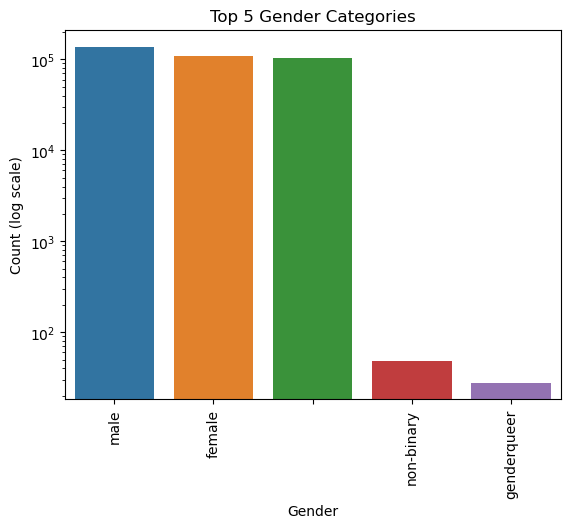

In [22]:
top_5 = dfw1['gender'].value_counts().nlargest(5)
sns.barplot(x=top_5.index, y=top_5.values, log=True) # log scale
plt.xlabel("Gender")
plt.ylabel("Count (log scale)")
plt.title("Top 5 Gender Categories")
plt.xticks(rotation=90)
plt.show()

Now, lets explore the 20 most popular authors in our dataset

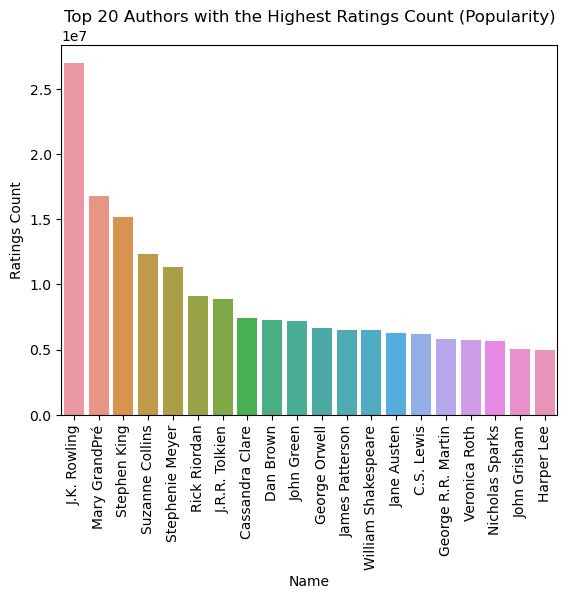

In [23]:
top_20 = dfw1.sort_values(by="ratings_count", ascending=False).head(20)
sns.barplot(x="name", y="ratings_count", data=top_20)
plt.xticks(rotation=90)
plt.title("Top 20 Authors with the Highest Ratings Count (Popularity)")
plt.xlabel("Name")
plt.ylabel("Ratings Count")
plt.show()

I will now analyse the histogram for the numerical columns (log applied). 

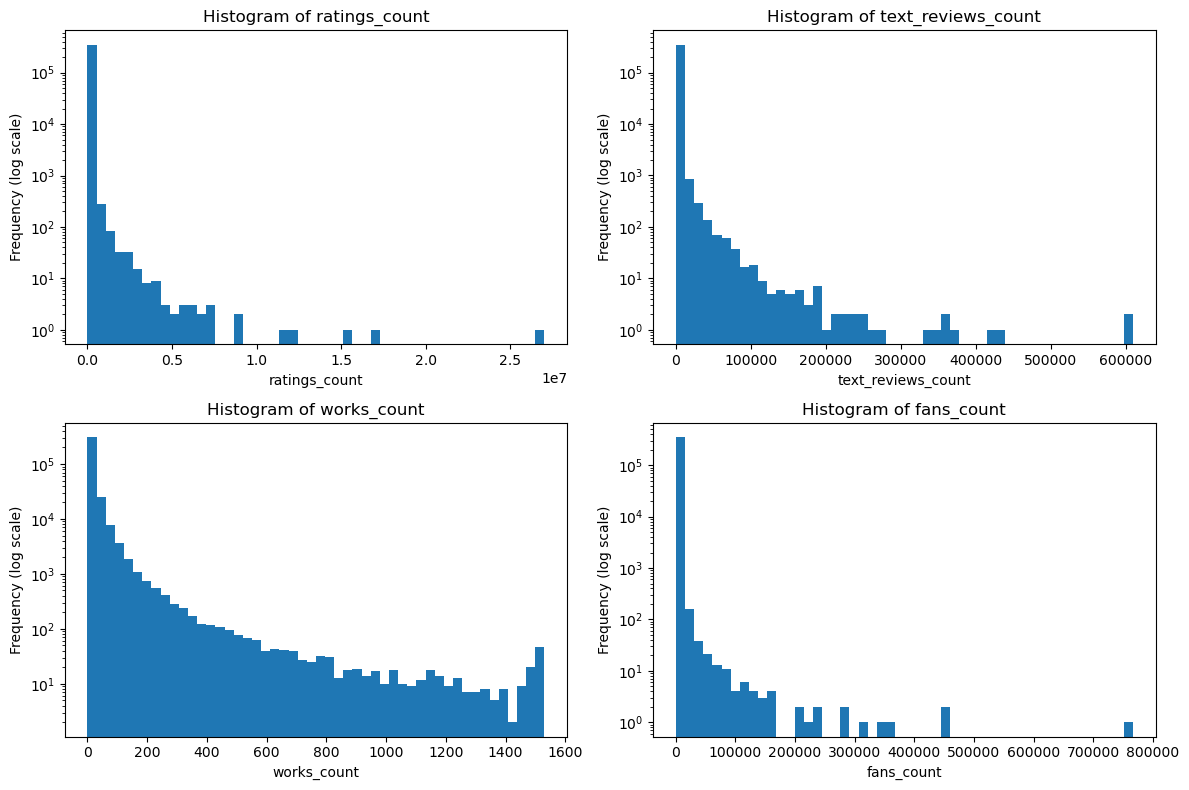

In [24]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

numerical_columns = ['ratings_count', 'text_reviews_count', 'works_count', 'fans_count']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel() # Flatten the 2D axes array for easy indexing
for i, col in enumerate(numerical_columns):
    ax = axes[i]
    ax.hist(dfw1[col], bins=50, log=True)  # Use log scale for the y-axis
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency (log scale)')
plt.tight_layout()
plt.show()

Most of them are right skewed. Lets make two more plots. One for the average_rating column - a box plot. And the Finally, the coorelation heatmap for the numerical data.

Text(0.5, 1.0, 'Box Plot for Average Rating')

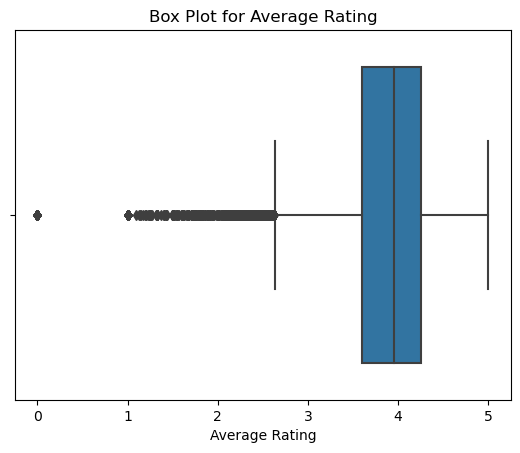

In [25]:
sns.boxplot(data = dfw1, x = "average_rating")
plt.xlabel("Average Rating")
plt.title("Box Plot for Average Rating")

The middle 50% of the values of the average rating column varies between 3.5 and 4.5m with the max value of 5. Now, lets make a correlation heat map. 

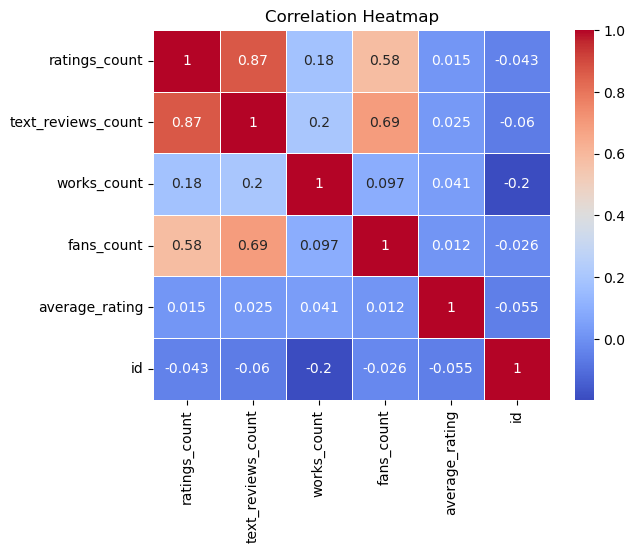

In [26]:
numerical_columns = ['ratings_count', 'text_reviews_count', 'works_count', 'fans_count', 'average_rating', 'id']
data = dfw1[numerical_columns]
matrix = data.corr()
sns.heatmap(matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

There appears to be high correlation between the following columns: ratings_count, text_reviews_count, fans_count, and average_rating.

# RQ4 

### Quirks questions about consistency. In most cases, we will not have a consistent dataset, and the one we are dealing with is no exception. So, let's enhance our analysis.

### 1.) You should be sure there are no eponymous (different authors who have precisely the same name) in the author's dataset. Is it true?

Lets do some preprocessing with the column: author_name in the ligher_books.json, as there are no duplicates in the ligher_authors.json datset for the name column. I will ensure that there are no trailing spaces, commas, underscores, and extra spaces between names. For the purpose of precision, I will have to deal with names in the lower case.

In [ ]:
# updating the author_name column to ensure no trailing spaces, commas, underscores, and extra spaces between names.
dfw['author_name'] = dfw['author_name'].str.strip().str.lower().replace(r'[\s,_]+', ' ', regex=True)
# Group by standardized author names and count the number of authors for each standardized name
author_counts = dfw['author_name'].value_counts()
# Check if there are eponymous authors (names with more than one author) after standardization
eponymous_authors = author_counts[author_counts > 1]
eponymous_authors

Looking at the counts, it is not true that there are there are no eponymous. However, the dataset is designed in a way that there will be same (similar) names repeated many times in combination with the corresponding title and author_id column. To ensure there are no duplicates, I will drop the rows where the values of author_name, title, author_id repeat. 

In [ ]:
dfw = dfw.drop_duplicates(subset=["id" ,"author_name", "title", "author_id"]) # drops where all column values are repeated

In [ ]:
dfw[["id", "author_name", "title", "author_id"]].duplicated().sum()

This part is just for demonstation purpose of the structure of the dataset. 

In [ ]:
grouped_df = dfw.groupby(['author_id', 'author_name'])
# Get a list of the titles for each group
titles = grouped_df['title'].apply(list)
titles

## RQ 4.2

### Write a function that, given a list of author_id, outputs a dictionary where each author_id is a key, and the related value is a list with the names of all the books the author has written.


In [ ]:
def fetch_titles(dfw, author_ids):
    # Filter the DataFrame to only include books written by the specified authors.
    filtered_dfw = dfw[dfw['author_id'].isin(author_ids)]
    
    # Create a dictionary to store the titles as values and author_id as keys
    author_titles = {}

    # Iterate over the filtered DataFrame and add each author-book mapping to the dictionary.
    for index, row in filtered_dfw.iterrows():
        author_id = row['author_id']
        book_title = row['title']
        if author_id not in author_titles:
            author_titles[author_id] = []
        author_titles[author_id].append(book_title)
    return author_titles

In [ ]:
sample_size = 5
asample = dfw["author_id"].sample(n=sample_size)

Lets test:

In [ ]:
titles_under_authorid = fetch_titles(dfw,list(asample))
titles_under_authorid

## RQ 4.3

### What is the longest book title among the books of the top 20 authors regarding their average rating? Is it the longest book title overall?

According to the question statment, we want to have the average rating of the author_name across all the books. Grouping and then calculating mean of average rating makes sense here:

In [ ]:
grouped = dfw.groupby(['author_name', 'author_id']).average_rating.mean().nlargest(20).reset_index()

In [ ]:
top_author_ids = grouped['author_id']
titles_under_authorid = fetch_titles(dfw,list(top_author_ids))
titles_under_authorid

Is it the longest book title overall? Lets check:

In [ ]:
def max_title_length(title_dict):  # title_dict a dictonary of titles
    max_len = 0 # initialisation
    for titles in title_dict.values(): # looking at the titles
        for title in titles: # each title under titles by the author
            title_length = len(title) # calculating the length
            if title_length > max_len:
                max_len = title_length # update
    return max_len

max_title_length_in_dict = max_title_length(titles_under_authorid)

print("Maximum title length:", max_title_length_in_dict)
print("Is it the longest book title overall?")

# calculating the maximum lenghth of the title across the column
max_title_length_in_dfw = dfw["title"].apply(len).max() 
if max_title_length_in_dict > max_title_length_in_dfw:
      print("Yes!")
else:
      print("No")

## RQ 4.4

### What is the shortest overall book title in the dataset? If you find something strange, provide a comment on what happened and an alternative answer.

In [ ]:
# calculating the minimum lenghth of the title across the column
min_title_length_in_dfw = dfw["title"].apply(len).min()
print(min_title_length_in_dfw)
dfw[dfw["title"].str.len() == min_title_length_in_dfw]

There are many books with short titles (len = 1). I do not find anything strange in it as authors may use the name that best suits there interest. Even the symbol π works well as a title

# RQ6 

### For this question, consider the top 10 authors concerning the number of fans again.

### Provide the average time gap between two subsequent publications for a series of books and those not belonging to a series. What do you expect to see, and what is the actual answer to this question?

In [ ]:
dfw.info()

In [ ]:
# top 10 authors concerning the number of fans / from the ligher_authors
top_10_authors = dfw1.sort_values(by="fans_count", ascending=False).head(10)[["name", "id"]]
top_10_auth_id = list(top_10_authors["id"]) # only ids
top_10_auth_id

In [ ]:
top_10_auth = list(dfw[dfw["author_id"].isin(list(top_10_authors["id"]))]["author_name"].unique())
top_10_auth # only names

In [ ]:
# filtering based on id is much safer as there might be authos with same names. But the id(s) are unique across the dataset
filtered_dfw = dfw[dfw['author_id'].isin(top_10_auth_id)]
series = filtered_dfw[filtered_dfw['series_id'].notnull()] # getting the dataframe where there is data for series
non_series = filtered_dfw[filtered_dfw['series_id'].isnull()] # getting the dataframe where there is no data for series

In [ ]:
# sorting by series name and publication date to compute the time differences.
series = series.sort_values(by=['series_name', 'publication_date']) 

# Calculate the time difference between subsequent publications and store it in a new var: time_gap
series.loc[:,'time_gap'] = series.groupby('series_name')['publication_date'].diff()

# Calculate the average time gap for each series
average_time_gap = series.groupby('series_name').agg({
    'author_name': 'first',
    'time_gap': 'mean'
})

# Remove NaN values (if the first publication in a series doesn't have a previous publication)
average_time_gap.dropna(inplace=True)

# Calculate the overall average time gap for all the series
overall_average_time_gap = average_time_gap['time_gap'].mean()

print("Average time gap between subsequent publications for each series with author names:")
print()
print(average_time_gap)
print("\nOverall average time gap for all the series:", overall_average_time_gap)

Similarly, now calculating for the non-series data:

In [ ]:
non_series = non_series.sort_values(by=['author_name', 'publication_date'])

# Calculate the time difference between subsequent publications
non_series.loc[:,'time_gap'] = non_series.groupby('author_name')['publication_date'].diff()

# Calculate the average time gap for each series
average_time_gap = non_series.groupby('author_name').agg({
    'time_gap': 'mean'
})

# Remove NaN values (if the first publication in a series doesn't have a previous publication)
average_time_gap.dropna(inplace=True)

# Calculate the overall average time gap
overall_average_time_gap = average_time_gap['time_gap'].mean()

print("Average time gap between subsequent publications for books with the same author names:")
print()
print(average_time_gap)
print("\nOverall average time gap for all the books:", overall_average_time_gap)

#### What do you expect to see, and what is the actual answer to this question?

The general expectation would be to have a average duration gap between each series to be smaller than the each individual books by the author. It possibly is because of the author is under pressure to keep bringing newer edition for its fanbase to retain popularity. Contrary to what one might expect, the books with series are, on average, taking more time in comparison to books without the series. However, there may be many latent variables that we have not taken into consideration, such as the number of pages per book, or workload on the author, or age of author etc.

### For each of the authors, give a convenient plot showing how many books has the given author published UP TO a given year. Are these authors contemporary with each other? Can you notice a range of years where their production rate was higher?

In [ ]:
def plot_books_published_by_author_up_to_year(df, top_authors, year):
    # Filter the DataFrame to include only the top authors
    filtered_df = df[df['author_id'].isin(top_10_auth_id)]
    # Create a stacked bar chart
    fig, ax = plt.subplots(figsize=(10, 6))

    author_collection = list(zip(top_10_auth, top_10_auth_id))

    # Iterate through the author IDs
    for name, author_id in author_collection:
        author_df = filtered_df[filtered_df['author_id'] == author_id]

        # Filter data up to the given year
        author_df = author_df[author_df['publication_date'].dt.year <= year]

        # Group by year and count the number of publications
        publication_counts = author_df.groupby(author_df['publication_date'].dt.year).size()

        years = publication_counts.index
        books_published = publication_counts.values

        ax.bar(years, books_published, label=f'Author Name: {name}')

    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Books Published')
    ax.set_title(f'Number of Books Published by Year (Up to {year})')
    ax.legend()

    # Show the stacked bar chart
    plt.show()

In [ ]:
plot_books_published_by_author_up_to_year(dfw, top_10_auth_id, 2014)

In [ ]:
#filtered_dfw.loc[:,'publication_year'] = pd.to_datetime(filtered_dfw['publication_date']).dt.year

# Group the dataframe by author_id and publication_date year
#grouped_dfw = filtered_dfw.groupby(['publication_year', 'author_name']).size()
#pivot = grouped_dfw.unstack(level='author_name') # unstack to have columns as authors and index as dates

# Create a stacked bar chart
#pivot.plot(kind='bar', stacked=True, figsize=(12, 6))

# Set labels and title
#plt.xlabel('Publication Year')
#plt.ylabel('Count of Books')
#plt.title('Stacked Bar Chart of Book Counts by Year')

# Show the plot
#plt.legend(title='Author Name')
#plt.show()

Publications from the top 10 authors we worked with before were the highest in the 2008-2018 period, peaking in 2014. Apparaently there seems to be no strong correlation between the number of books published by authors in those years, for there are some autors who published less than 20 books in the peak year (2014) and some who published more than 400 books.